In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/pragunisanotra/Documents/LearnTrackAI/notebook/data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


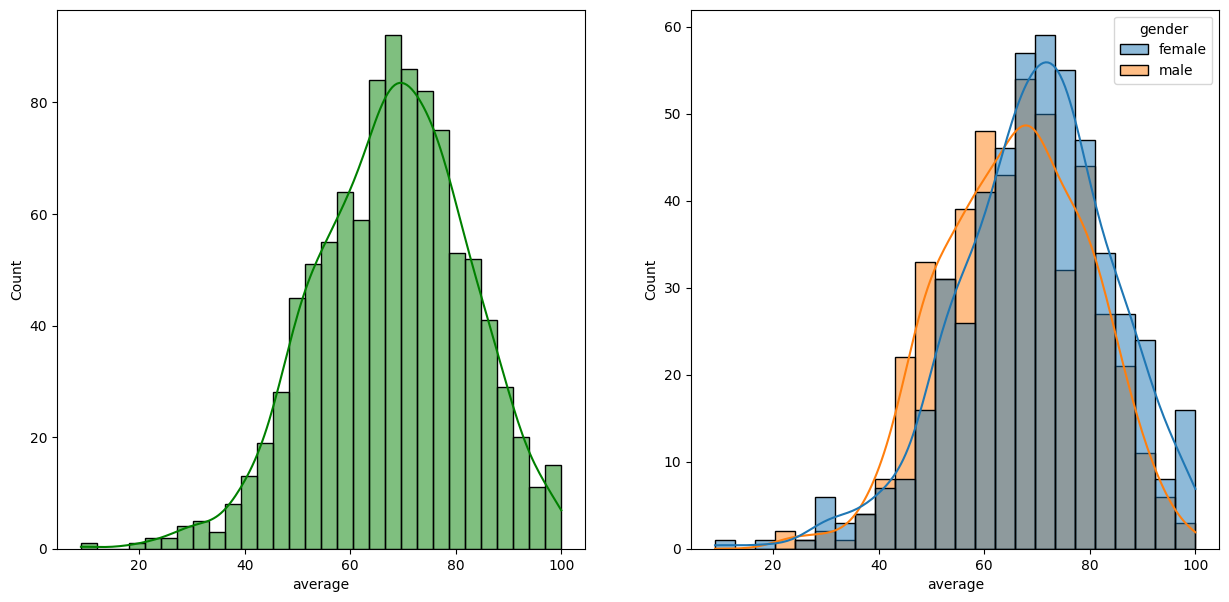

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

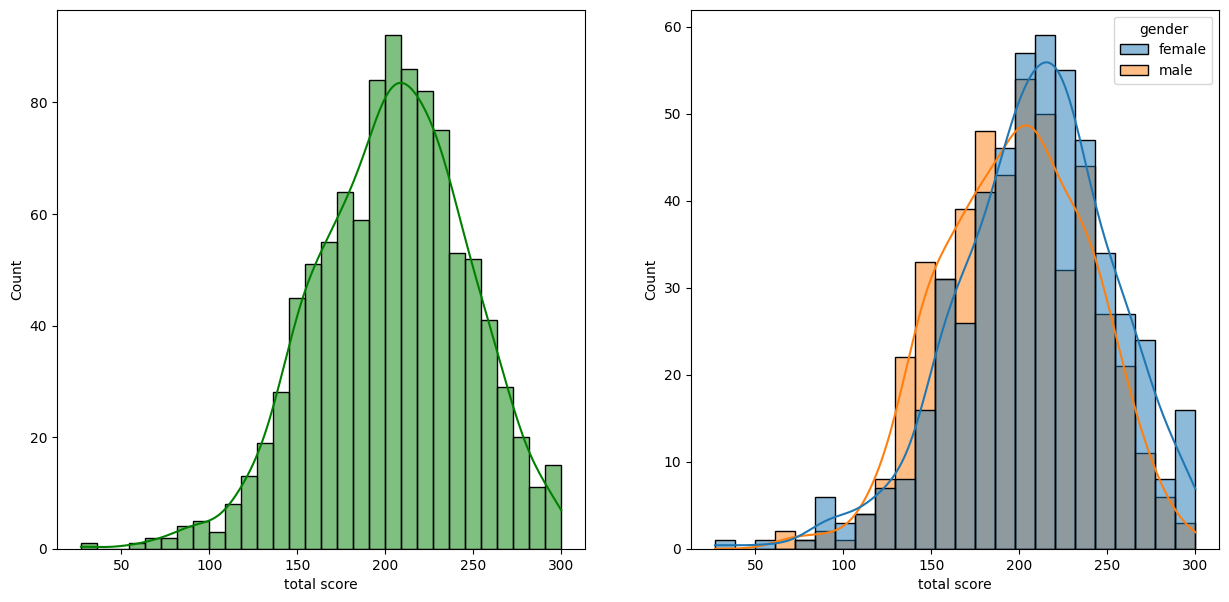

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

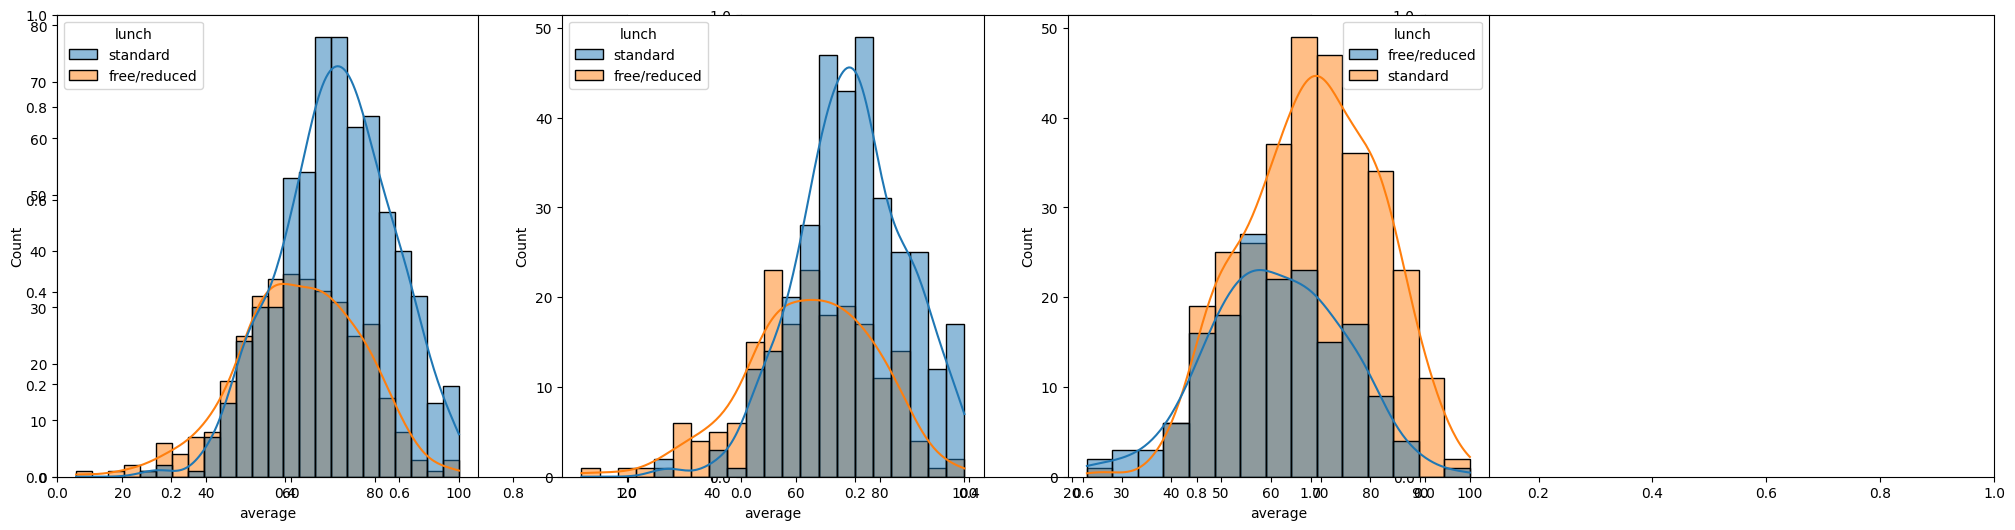

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the column 'parental level of education' exists in the DataFrame
if 'parental level of education' in df.columns:
    # Creating the subplots
    plt.subplots(1, 3, figsize=(25, 6))
    
    # Plot 1: Overall distribution
    plt.subplot(141)
    ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
    
    # Plot 2: Distribution for male students
    plt.subplot(142)
    ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
    
    # Plot 3: Distribution for female students
    plt.subplot(143)
    ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
    
    plt.show()


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the column 'race/ethnicity' exists in the DataFrame
if 'race/ethnicity' in df.columns:
    # Creating the figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))
    fig.suptitle('Distribution of Average Scores by Race/Ethnicity', fontsize=16)
    
    # Plot 1: Overall distribution
    sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', ax=ax1)
    ax1.set_title('Overall Distribution')
    ax1.set_xlabel('Average Score')
    ax1.set_ylabel('Count')
    
    # Plot 2: Distribution for female students
    sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity', ax=ax2)
    ax2.set_title('Distribution for Female Students')
    ax2.set_xlabel('Average Score')
    ax2.set_ylabel('Count')
    
    # Plot 3: Distribution for male students
    sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity', ax=ax3)
    ax3.set_title('Distribution for Male Students')
    ax3.set_xlabel('Average Score')
    ax3.set_ylabel('Count')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

All columns: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')
Using 'math_score' for math score
Using 'reading_score' for reading score
Using 'writing_score' for writing score


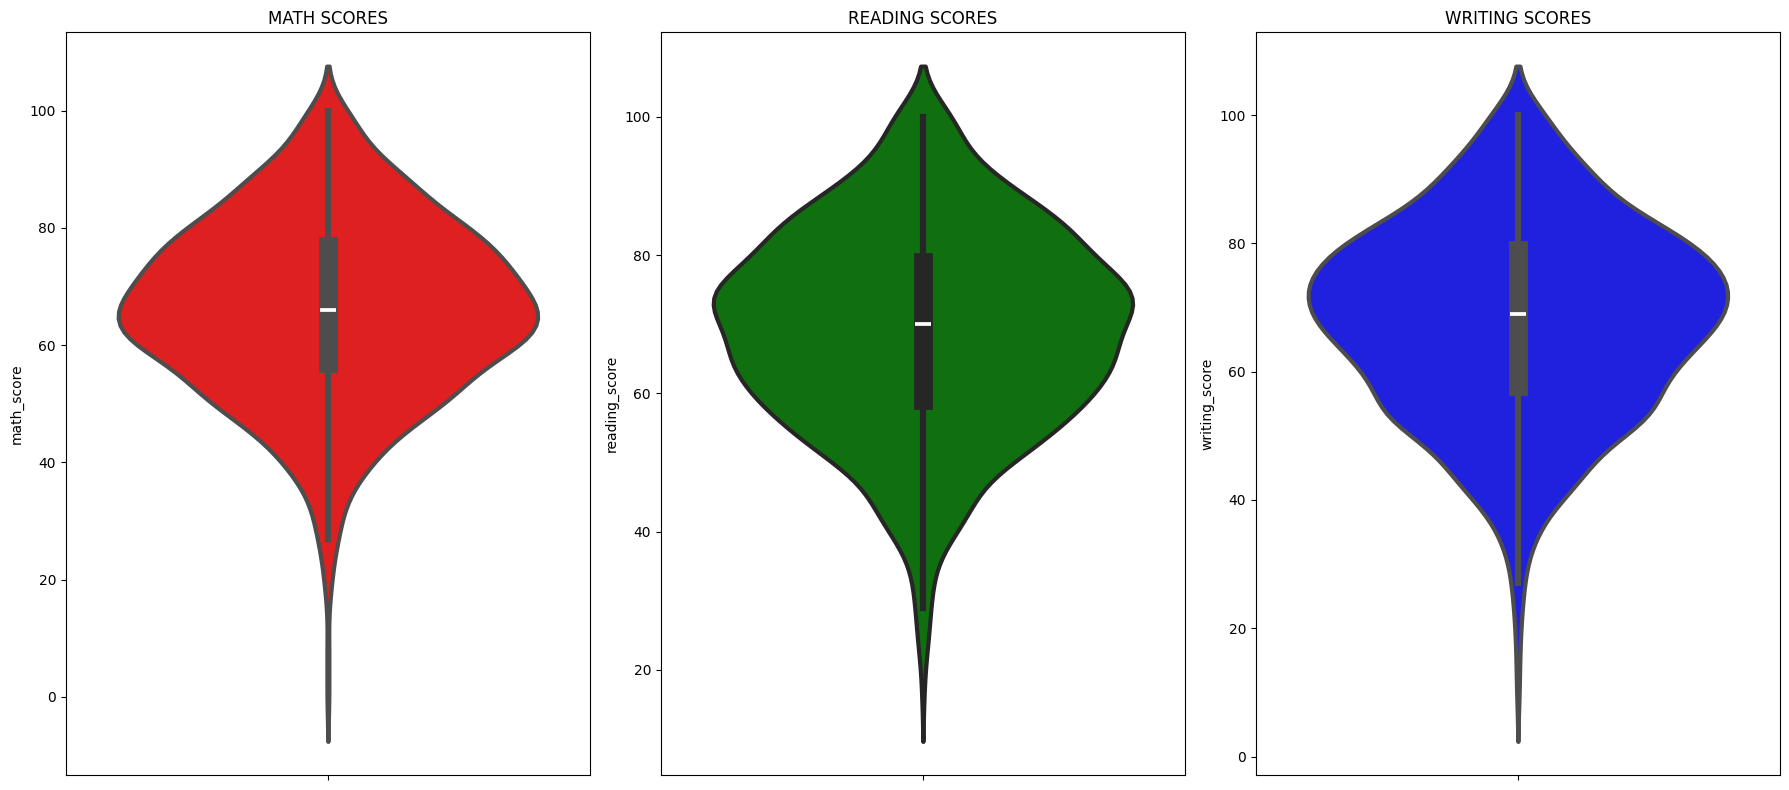

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for reference
print("All columns:", df.columns)

# Try to find columns for scores
math_col = next((col for col in df.columns if 'math' in col.lower()), None)
reading_col = next((col for col in df.columns if 'reading' in col.lower()), None)
writing_col = next((col for col in df.columns if 'writing' in col.lower()), None)

print(f"Using '{math_col}' for math score")
print(f"Using '{reading_col}' for reading score")
print(f"Using '{writing_col}' for writing score")

plt.figure(figsize=(18, 8))

if math_col:
    plt.subplot(1, 3, 1)
    plt.title('MATH SCORES')
    sns.violinplot(y=math_col, data=df, color='red', linewidth=3)
else:
    plt.subplot(1, 3, 1)
    plt.title('MATH SCORES')
    plt.text(0.5, 0.5, 'Math score column not found', ha='center', va='center')

if reading_col:
    plt.subplot(1, 3, 2)
    plt.title('READING SCORES')
    sns.violinplot(y=reading_col, data=df, color='green', linewidth=3)
else:
    plt.subplot(1, 3, 2)
    plt.title('READING SCORES')
    plt.text(0.5, 0.5, 'Reading score column not found', ha='center', va='center')

if writing_col:
    plt.subplot(1, 3, 3)
    plt.title('WRITING SCORES')
    sns.violinplot(y=writing_col, data=df, color='blue', linewidth=3)
else:
    plt.subplot(1, 3, 3)
    plt.title('WRITING SCORES')
    plt.text(0.5, 0.5, 'Writing score column not found', ha='center', va='center')

plt.tight_layout()
plt.show()

Column 'race/ethnicity' not found in the DataFrame
Column 'test preparation course' not found in the DataFrame
Column 'parental level of education' not found in the DataFrame

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes

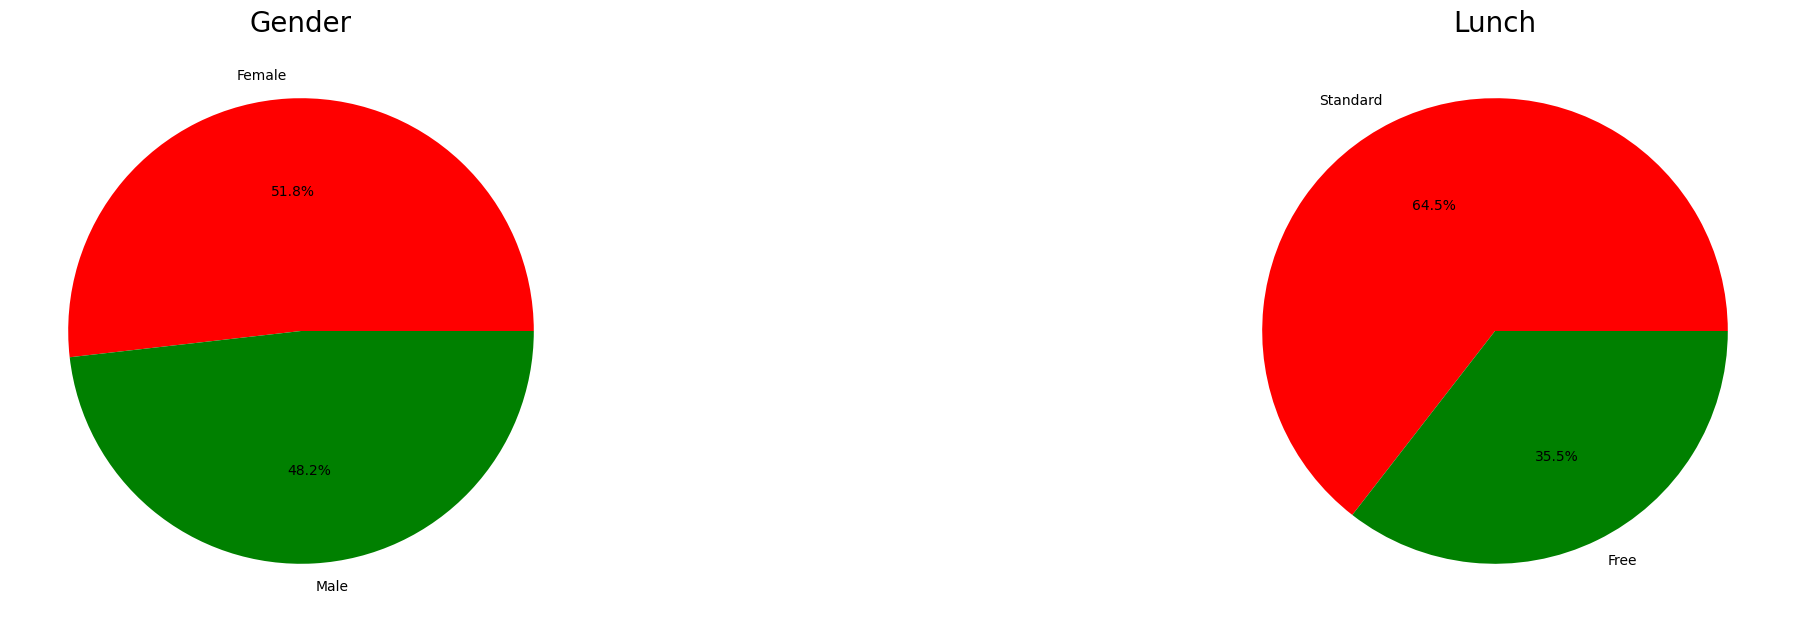

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# Function to create a pie chart if the column exists
def create_pie_chart(df, column, title, position, labels=None, colors=None):
    if column in df.columns:
        plt.subplot(1, 5, position)
        size = df[column].value_counts()
        if labels is None:
            labels = size.index
        if colors is None:
            colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
        plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%')
        plt.title(title, fontsize=20)
        plt.axis('off')
    else:
        print(f"Column '{column}' not found in the DataFrame")

# List of charts to create
charts = [
    ('gender', 'Gender', ['Female', 'Male'], ['red', 'green']),
    ('race/ethnicity', 'Race/Ethnicity', ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], ['red', 'green', 'blue', 'cyan', 'orange']),
    ('lunch', 'Lunch', ['Standard', 'Free'], ['red', 'green']),
    ('test preparation course', 'Test Course', ['None', 'Completed'], ['red', 'green']),
    ('parental level of education', 'Parental Education', ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"], ['red', 'green', 'blue', 'cyan', 'orange', 'grey'])
]

# Create pie charts
for i, (column, title, labels, colors) in enumerate(charts, start=1):
    create_pie_chart(df, column, title, i, labels, colors)

# Print DataFrame info for debugging
print("\nDataFrame Info:")
print(df.info())

print("\nDataFrame Columns:")
print(df.columns)

plt.tight_layout()
plt.show()

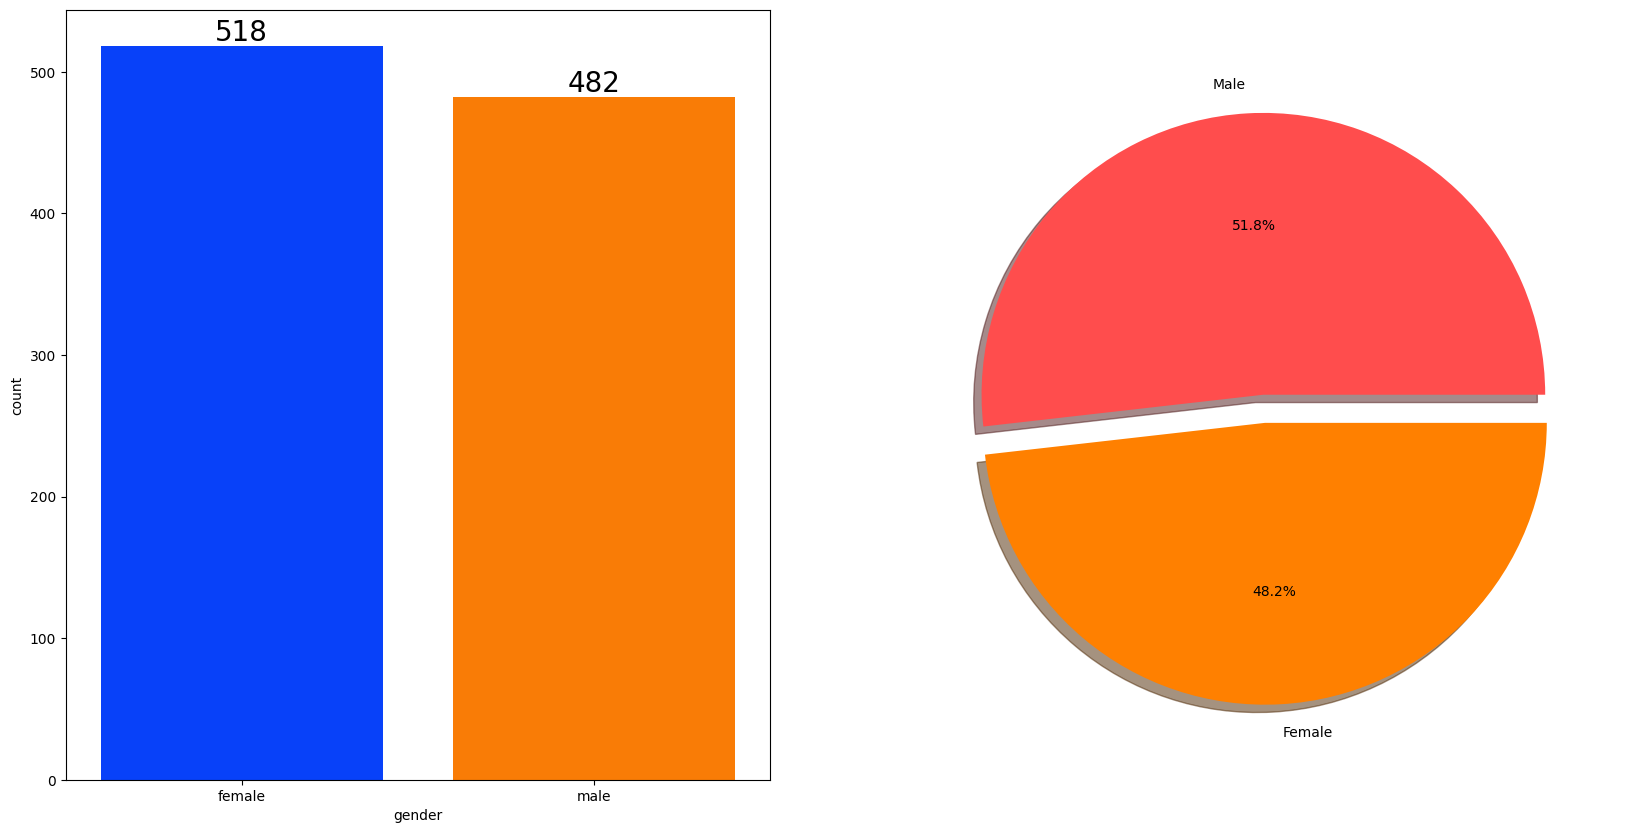

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [36]:
import pandas as pd
import numpy as np

# First, let's see what columns we have and their types
print("Column types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by gender and calculate mean for numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

# For non-numeric columns, we'll get the most common value
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
categorical_columns = [col for col in categorical_columns if col != 'gender']

for col in categorical_columns:
    gender_group[f'{col}_mode'] = df.groupby('gender')[col].agg(lambda x: x.value_counts().index[0])

print("\nGrouped data:")
print(gender_group)

# If you want to see count of each group
gender_count = df['gender'].value_counts()
print("\nCount of each gender:")
print(gender_count)

Column types:
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object

First few rows:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

print("\nColumns in gender_group:")
print(gender_group.columns)

# Identify the correct column names
total_avg_col = 'average' if 'average' in gender_group.columns else None
math_score_col = 'math score' if 'math score' in gender_group.columns else None

if total_avg_col is None or math_score_col is None:
    print("\nWarning: Required columns not found. Please check your data.")
    print("Available columns:", gender_group.columns)
else:
    plt.figure(figsize=(10, 8))

    X = ['Total Average', 'Math Average']

    female_scores = [gender_group[total_avg_col]['female'], gender_group[math_score_col]['female']]
    male_scores = [gender_group[total_avg_col]['male'], gender_group[math_score_col]['male']]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
    plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

    plt.xticks(X_axis, X)
    plt.ylabel("Marks")
    plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
    plt.legend()
    plt.show()

# If you still can't find the right columns, let's print some sample data
print("\nSample data from gender_group:")
print(gender_group.head())

print("\nSample data from original DataFrame:")
print(df.head())

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Columns in gender_group:
Index(['math_score', 'reading_score', 'writing_score', 'total score',
       'average', 'race_ethnicity_mode', 'parental_level_of_education_mode',
       'lunch_mode', 'test_preparation_course_mode'],
      dtype='object')

Available columns: Index(['math_score', 'reading_score', 'writing_score', 'total score',
       'average', 'race_ethnicity_mode', 'parental_level_of_education_mode',
       'lunch_mode', 'test_preparation_course_mode'],
      dtype='object')

Sample data from gender_group:
        math_score  reading_score  writing_score  total score    average  \
gender                                                                     
female   63.633205      72.608108      72.467181   208.708494  69.569498   
male     

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Using column 'race_ethnicity' for race/ethnicity


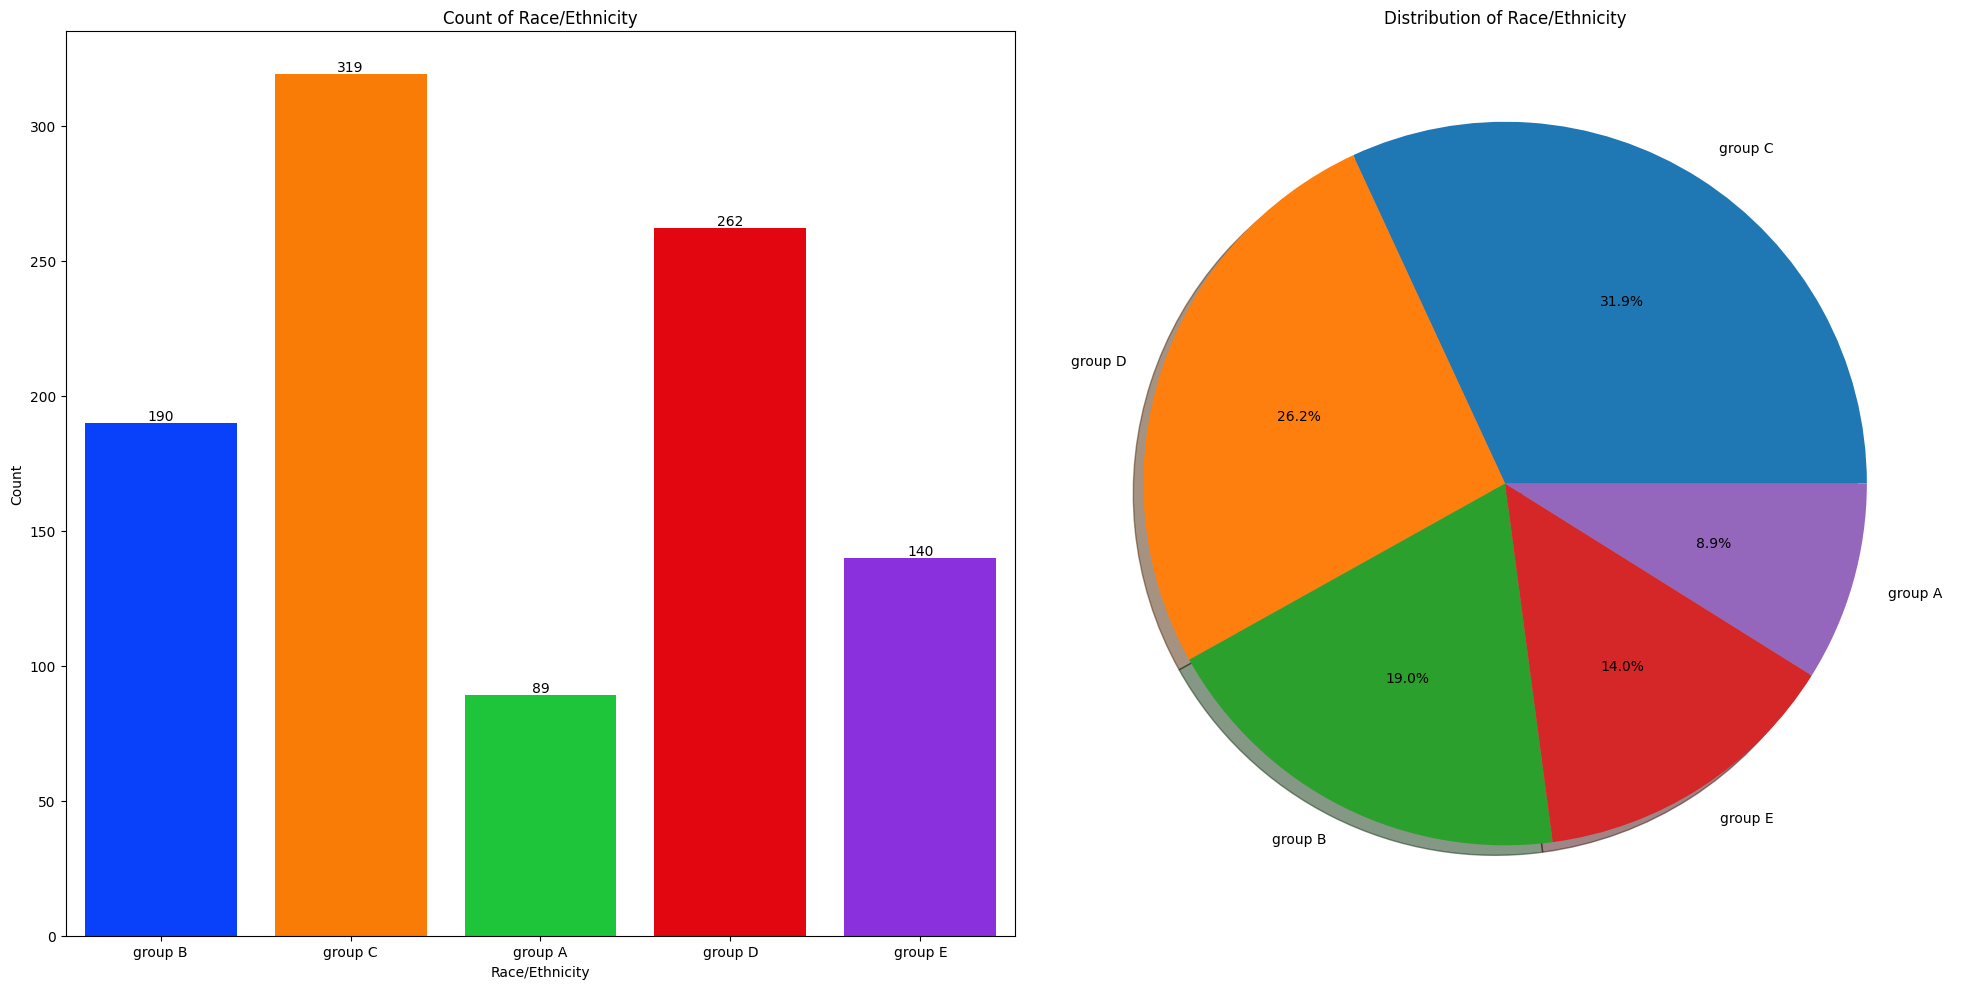


Sample data from DataFrame:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Try to find a column that might represent race/ethnicity
possible_columns = [col for col in df.columns if 'race' in col.lower() or 'ethnic' in col.lower()]

if possible_columns:
    race_column = possible_columns[0]
    print(f"\nUsing column '{race_column}' for race/ethnicity")
else:
    print("\nNo column found that seems to represent race/ethnicity")
    print("Please check your data and provide the correct column name")
    race_column = None

if race_column:
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    # Countplot
    sns.countplot(x=df[race_column], data=df, palette='bright', ax=ax[0], saturation=0.95)
    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=10)
    ax[0].set_title('Count of Race/Ethnicity')
    ax[0].set_xlabel('Race/Ethnicity')
    ax[0].set_ylabel('Count')
    
    # Pie chart
    race_counts = df[race_column].value_counts()
    ax[1].pie(x=race_counts, labels=race_counts.index, autopct='%1.1f%%', shadow=True)
    ax[1].set_title('Distribution of Race/Ethnicity')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nCannot create plots without the race/ethnicity column")

# Print sample data for further inspection
print("\nSample data from DataFrame:")
print(df.head())

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

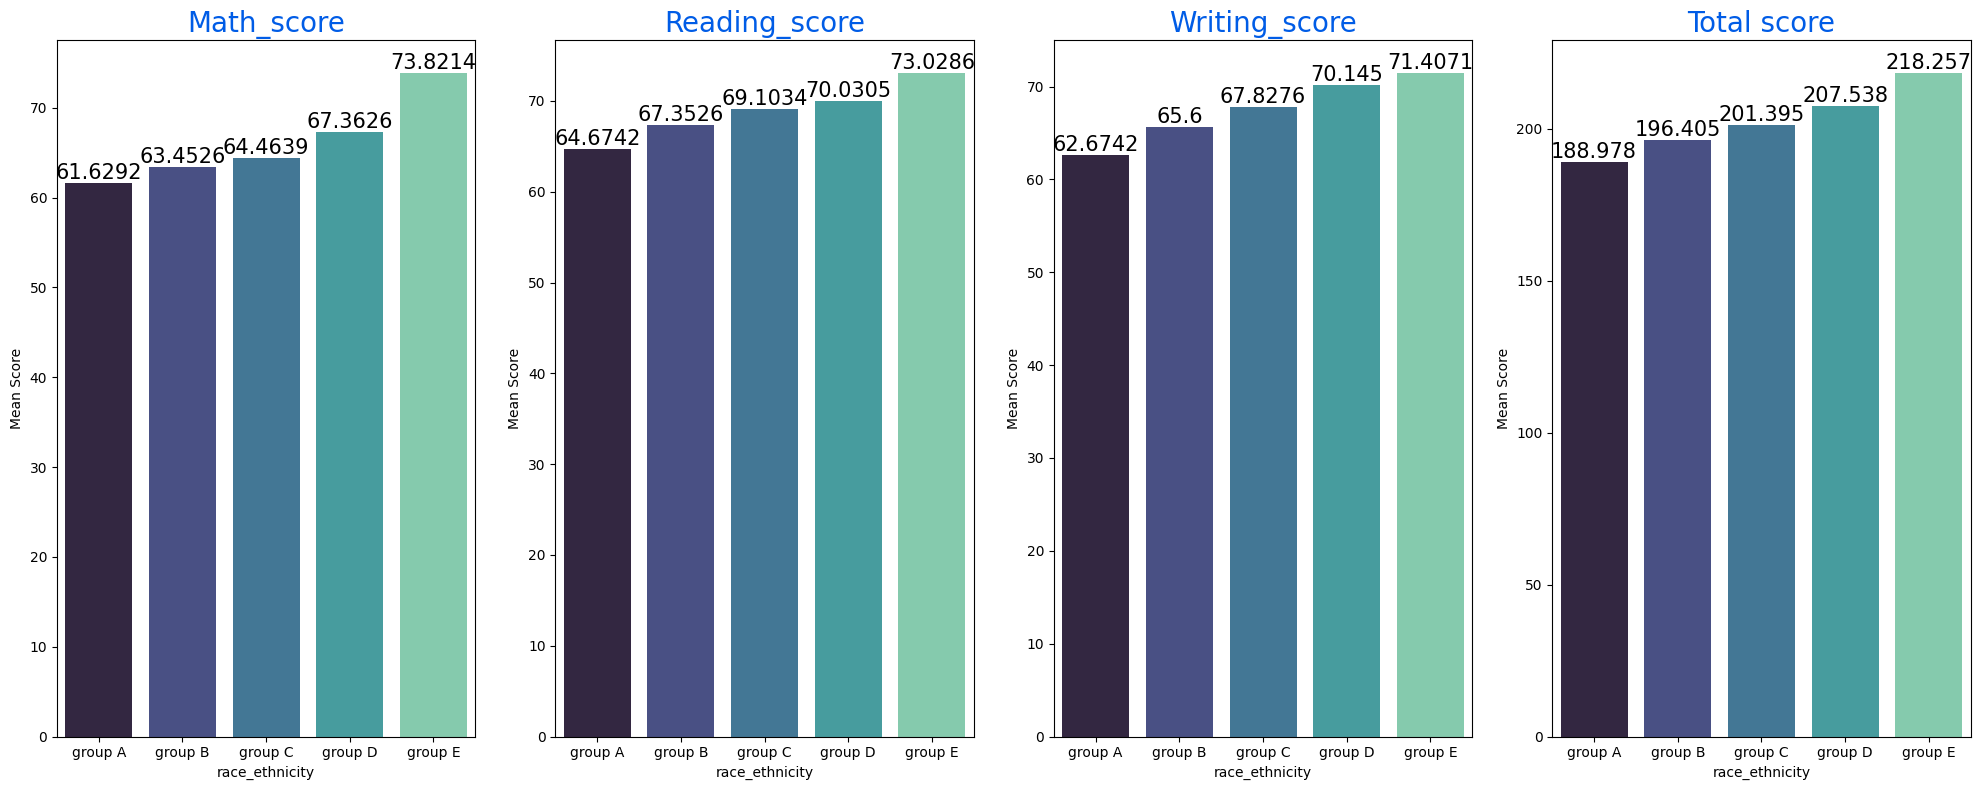


Unique values in each column:
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']
math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writi

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Try to identify columns that might represent scores
score_columns = [col for col in df.columns if 'score' in col.lower()]

if score_columns:
    print("\nFound score columns:", score_columns)
    
    # Try to find a column that might represent race/ethnicity
    possible_group_columns = [col for col in df.columns if 'group' in col.lower() or 'race' in col.lower() or 'ethnic' in col.lower()]
    
    if possible_group_columns:
        group_column = possible_group_columns[0]
        print(f"\nUsing column '{group_column}' for grouping")
        
        Group_data2 = df.groupby(group_column)
        
        f, ax = plt.subplots(1, len(score_columns), figsize=(20, 8))
        
        for i, score_col in enumerate(score_columns):
            sns.barplot(x=Group_data2[score_col].mean().index, y=Group_data2[score_col].mean().values, palette='mako', ax=ax[i])
            ax[i].set_title(f'{score_col.capitalize()}', color='#005ce6', size=20)
            
            for container in ax[i].containers:
                ax[i].bar_label(container, color='black', size=15)
            
            ax[i].set_xlabel(group_column)
            ax[i].set_ylabel('Mean Score')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo suitable grouping column found. Please specify the correct column for race/ethnicity.")
else:
    print("\nNo score columns found. Please check your data.")

# If still having issues, print unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

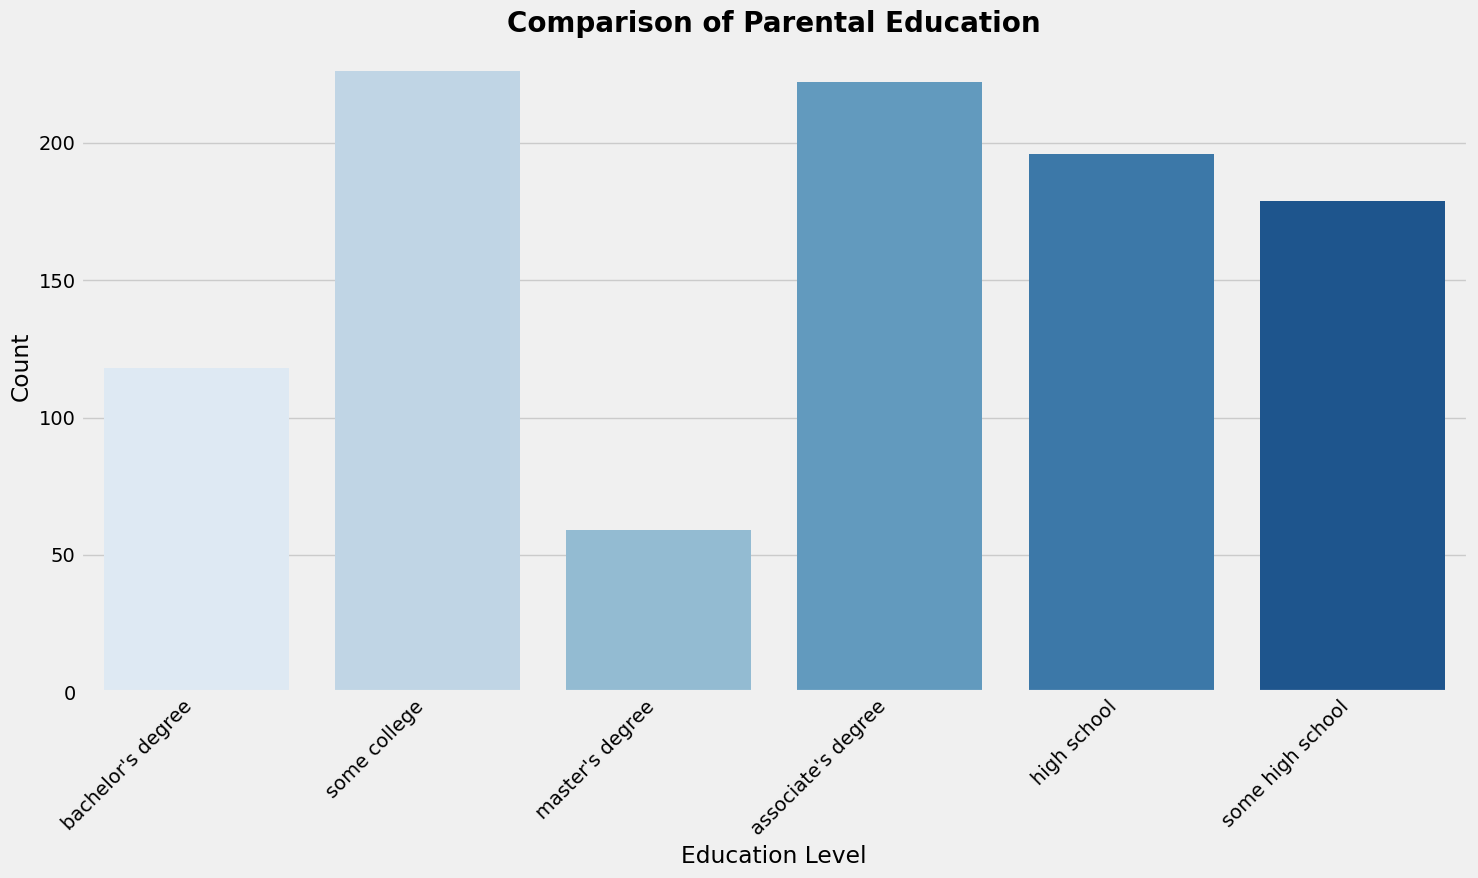


Unique values in each column:
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']
math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writi

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Try to find a column that might represent parental education
possible_education_columns = [col for col in df.columns if 'education' in col.lower() or 'parent' in col.lower()]

if possible_education_columns:
    education_column = possible_education_columns[0]
    print(f"\nUsing column '{education_column}' for parental education")

    plt.figure(figsize=(15, 9))
    plt.style.use('fivethirtyeight')
    
    sns.countplot(x=df[education_column], palette='Blues')
    plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo suitable column found for parental education. Please specify the correct column name.")

# If still having issues, print unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

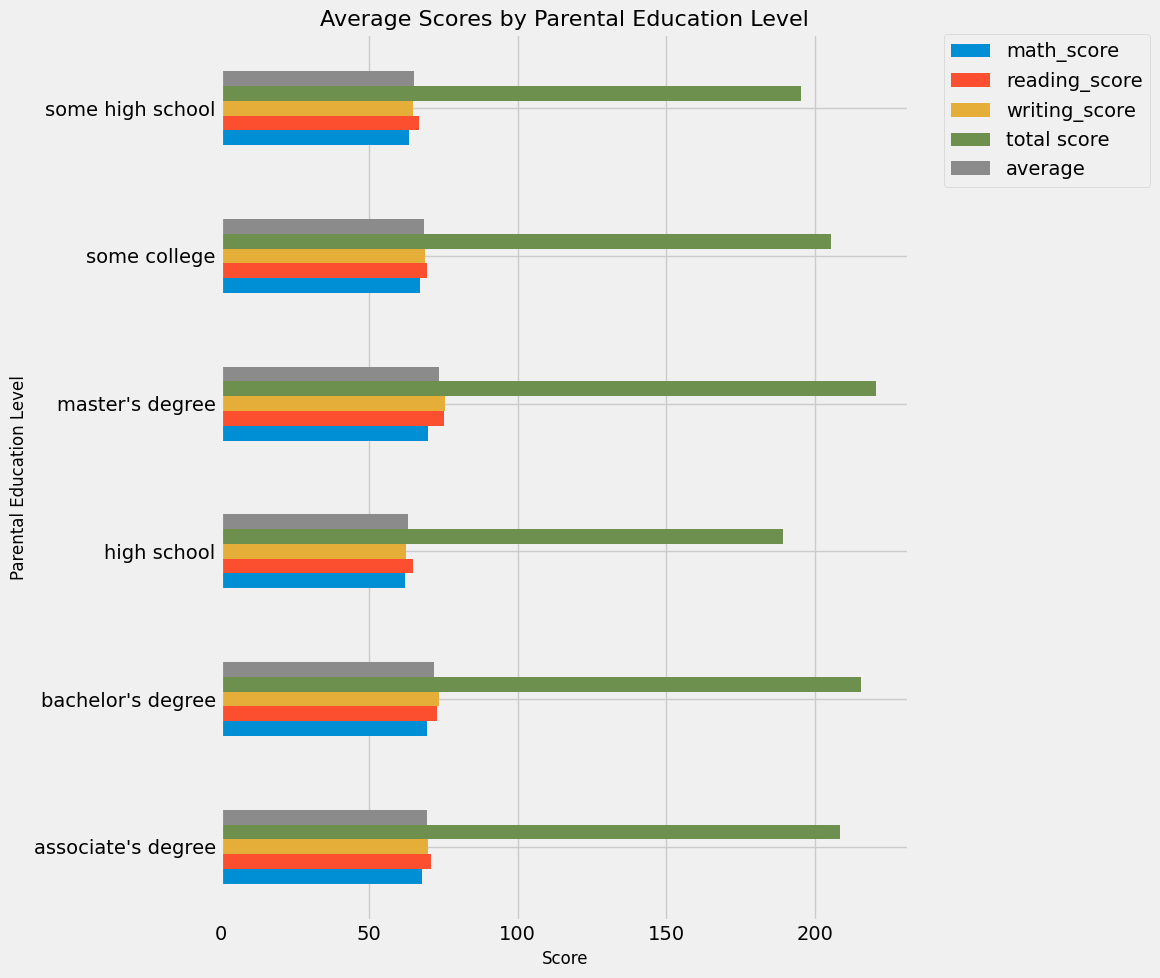


Unique values in each column:
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']
math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writi

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Try to find a column that might represent parental education
possible_education_columns = [col for col in df.columns if 'education' in col.lower() or 'parent' in col.lower()]

if possible_education_columns:
    education_column = possible_education_columns[0]
    print(f"\nUsing column '{education_column}' for parental education")

    # Group by the education column and calculate mean for numeric columns
    grouped_data = df.groupby(education_column).mean(numeric_only=True)

    # Plot
    ax = grouped_data.plot(kind='barh', figsize=(12, 10))
    plt.title('Average Scores by Parental Education Level', fontsize=16)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Parental Education Level', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo suitable column found for parental education. Please specify the correct column name.")

# If still having issues, print unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

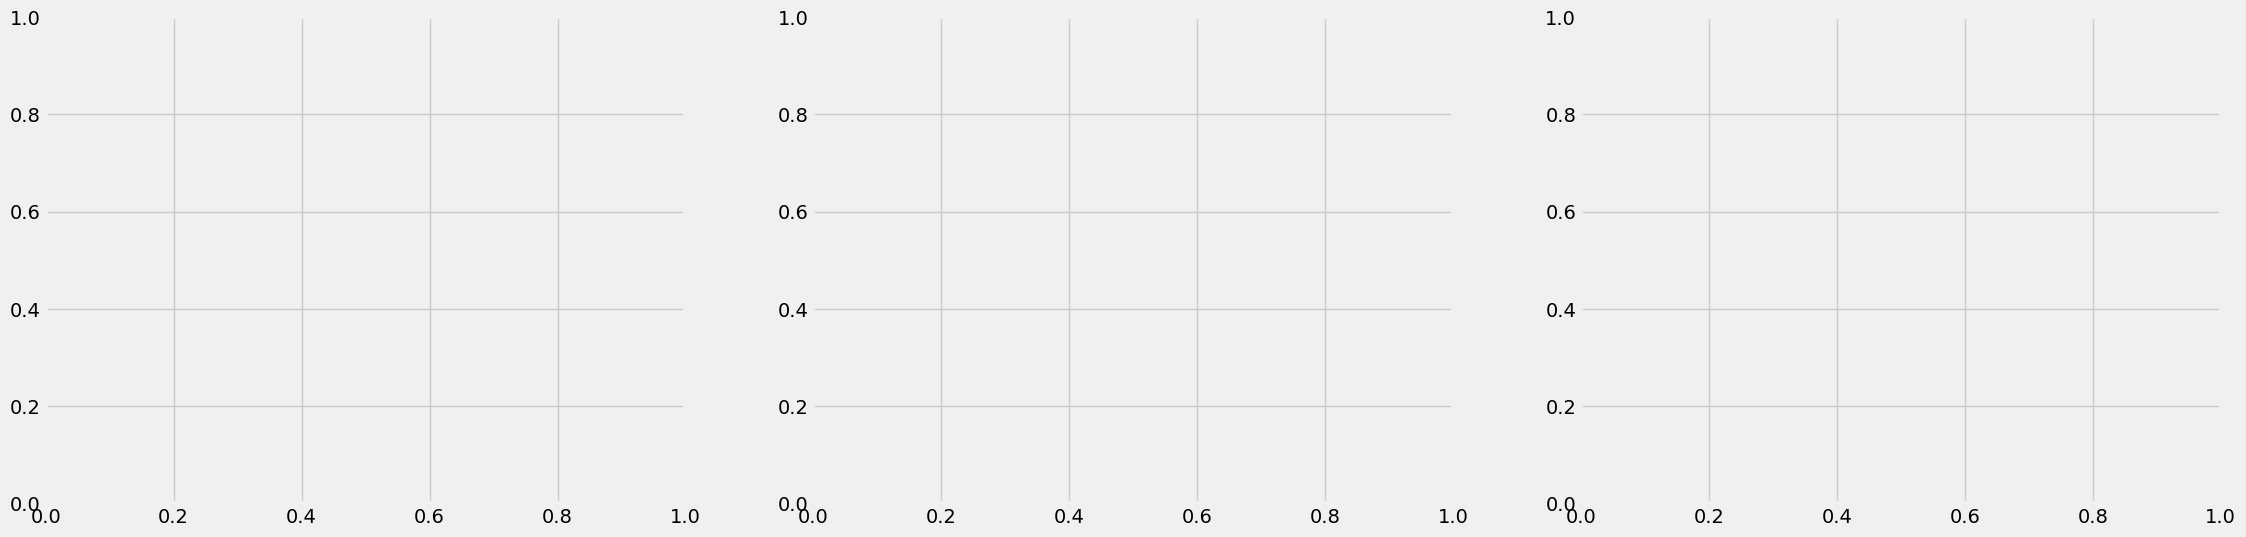

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Set figure size
plt.subplots(1, 3, figsize=(25, 6))

# Check if 'parental level of education' column exists
if 'parental level of education' in df.columns:
    # Plot 1: General
    plt.subplot(141)
    sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
    
    # Plot 2: Male students
    plt.subplot(142)
    sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
    
    # Plot 3: Female students
    plt.subplot(143)
    sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
    
    # Show plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'parental level of education' column is not present in the DataFrame.")
    
    # Print available columns
    print("\nAvailable columns:")
    print(df.columns)
    
    # Suggest a possible alternative
    possible_columns = [col for col in df.columns if 'parental' in col.lower()]
    if possible_columns:
        print(f"\nPossible related column(s) found: {possible_columns}")
        print("You might want to use one of these instead.")
    else:
        print("\nNo related columns found. Please check your data.")


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Check if 'parental level of education' column exists
if 'parental level of education' in df.columns:
    f, ax = plt.subplots(1, 2, figsize=(20, 8))

    # Plot 1: Parental level of education vs test preparation course
    sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
    ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=20)

    # Plot 2: Parental level of education vs lunch
    sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
    ax[1].set_title('Students vs Lunch', color='black', size=25)
    for container in ax[1].containers:
        ax[1].bar_label(container, color='black', size=20)

    plt.tight_layout()
    plt.show()
else:
    print("The 'parental level of education' column is not present in the DataFrame.")
    
    # Print available columns
    print("\nAvailable columns:")
    print(df.columns)
    
    # Suggest a possible alternative
    possible_columns = [col for col in df.columns if 'parental' in col.lower()]
    if possible_columns:
        print(f"\nPossible related column(s) found: {possible_columns}")
        print("You might want to use one of these instead.")
    else:
        print("\nNo related columns found. Please check your data.")


Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names for debugging
print("Columns in the DataFrame:")
print(df.columns)

# Print a sample of the data
print("\nSample data:")
print(df.head())

# Strip whitespace from column names (if necessary)
df.columns = df.columns.str.strip()

# Ensure the correct column names
# Update these names based on the actual column names printed
correct_math_score_col = 'math score'  # Check this name carefully
correct_reading_score_col = 'reading score'  # Check this name carefully
correct_writing_score_col = 'writing score'  # Check this name carefully

# Check if the columns exist
if correct_math_score_col not in df.columns:
    print(f"Error: '{correct_math_score_col}' not found in DataFrame columns.")
    print(f"Available columns: {df.columns}")
if correct_reading_score_col not in df.columns:
    print(f"Error: '{correct_reading_score_col}' not found in DataFrame columns.")
    print(f"Available columns: {df.columns}")
if correct_writing_score_col not in df.columns:
    print(f"Error: '{correct_writing_score_col}' not found in DataFrame columns.")
    print(f"Available columns: {df.columns}")

# Plotting only if all columns are found
if (correct_math_score_col in df.columns and 
    correct_reading_score_col in df.columns and 
    correct_writing_score_col in df.columns):
    
    plt.figure(figsize=(12, 6))

    # Plot 1: Lunch vs Math Score
    plt.subplot(2, 2, 1)
    sns.barplot(x='lunch', y=correct_math_score_col, hue='test preparation course', data=df)
    plt.title('Lunch vs Math Score')

    # Plot 2: Lunch vs Reading Score
    plt.subplot(2, 2, 2)
    sns.barplot(x='lunch', y=correct_reading_score_col, hue='test preparation course', data=df)
    plt.title('Lunch vs Reading Score')

    # Plot 3: Lunch vs Writing Score
    plt.subplot(2, 2, 3)
    sns.barplot(x='lunch', y=correct_writing_score_col, hue='test preparation course', data=df)
    plt.title('Lunch vs Writing Score')

    plt.tight_layout()
    plt.show()


Columns in the DataFrame:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

Sample data:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47     

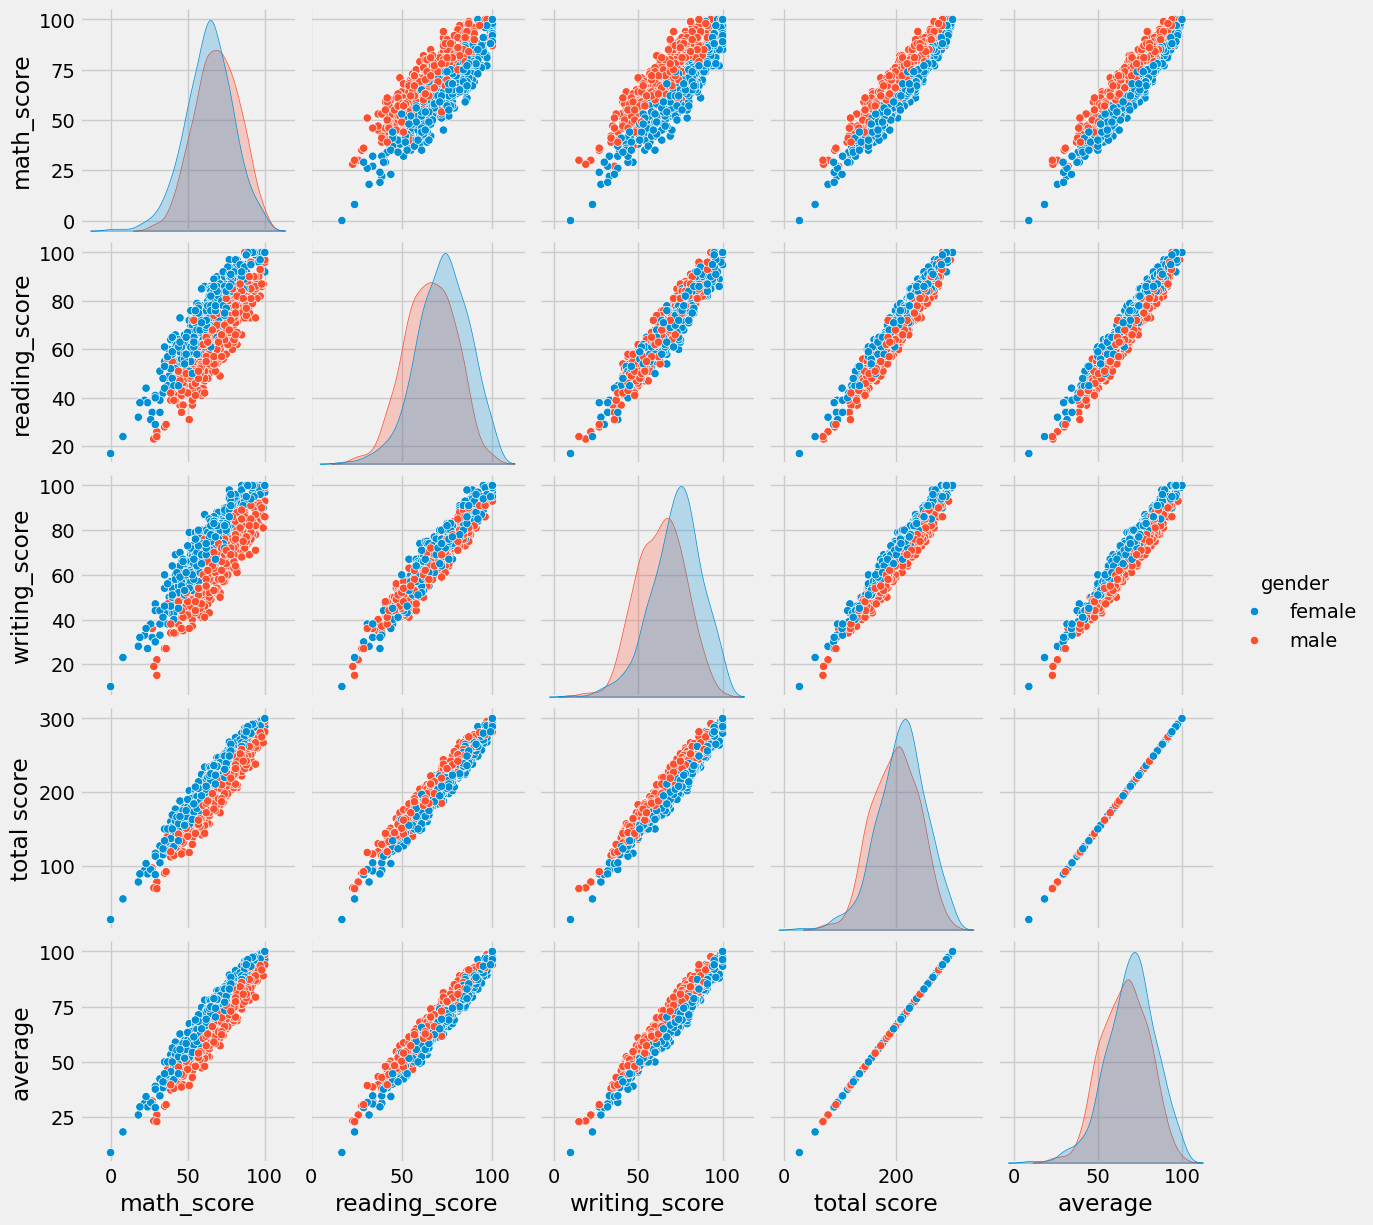

In [62]:
sns.pairplot(df,hue = 'gender')
plt.show()